### ООП

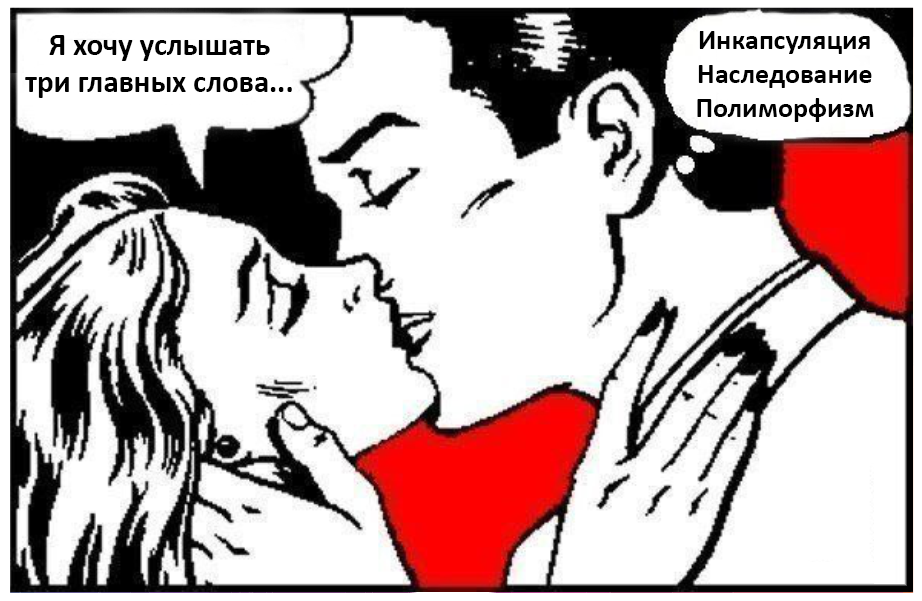

In [1]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "mem.png", width = 600, height = 300)

 - Инкапсуляция

работа с данными через интерфейс класса
вместо того, чтобы напрямую обращаться к аттрибутам класса

- Полиморфизм

способность обьекта использовать методы производного класса, который не существует на момент создания базового

- Наследование

переиспользование аттрибутов и методов, некоторого родительского класса

In [4]:
# класс нужно воспринимать как некий интерфейс/ шаблон/ описание типа какого-то объекта

In [254]:
class Person:
    # инициализация/ конструктор класса
    def __init__(self, name=None, surname=None):
        self.name = name
        self.surname = surname

In [6]:
person = Person('Иван', 'Иванов')

In [255]:
person_other = Person()

In [256]:
type(person)

__main__.Person

- Пример инкапсуляции

если хотим изменить фамилию человека, считается плохим тоном делать что-то в духе:
    
    

In [257]:
person.surname = 'Андреев'

In [258]:
person.surname

'Андреев'

In [10]:
class Person:
    # инициализация/ конструктор класса
    def __init__(self, name, surname):
        self.name = name
        self.surname = surname
        
    def change_surname(self, new_surname):
        self.surname = new_surname

In [12]:
person = Person('Иван', 'Иванов')
person.change_surname('Aндреев')
person.surname

'Aндреев'

In [270]:
#Почему может быть плохо изменять значение аттрибута/ поля класса surname?

class Person:
    # инициализация/ конструктор класса
    def __init__(self, name, surname):
        self.name = name
        self.surname = surname
        self.full_name = '{} {}'.format(self.name, self.surname)
        
    def change_surname(self, new_surname):
        self.surname = new_surname
        self.full_name = '{} {}'.format(self.name, self.surname)
        
    def get_full_name(self):
        return '{} {}'.format(self.name, self.surname)

In [271]:
person1 = Person('Иван', 'Иванов')
person2 = Person('Иван', 'Иванов')
person1.change_surname('Aндреев')
person1.full_name

'Иван Aндреев'

In [273]:
person2.surname = 'Андреев'
person2.get_full_name(), person2.full_name

('Иван Андреев', 'Иван Иванов')

In [20]:
#узнать все поля класса
person1.__dict__

{'name': 'Иван', 'surname': 'Aндреев', 'full_name': 'Иван Aндреев'}

In [274]:
# все опредленные поля и методы класса
person1.__dir__()

['name',
 'surname',
 'full_name',
 '__module__',
 '__init__',
 'change_surname',
 'get_full_name',
 '__dict__',
 '__weakref__',
 '__doc__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__new__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

In [285]:
# Уже известная обертка str, repr
class Person:
    # инициализация/ конструктор класса
    def __init__(self, name, surname):
        self.name = name
        self.surname = surname
        self.full_name = '{} {}'.format(self.name, self.surname)
        
    def change_surname(self, new_surname):
        self.surname = new_surname
        self.full_name = '{} {}'.format(self.name, self.surname)
        
    def __str__(self):
        return self.full_name
    
    def __repr__(self):
        return 'Instance of Person class {}'.format(self) # 'Instance of Person class {}'.format(str(self))

In [286]:
person = Person('Иван', 'Иванов')
person.change_surname('Aндреев')
print(person)

Иван Aндреев


In [287]:
str(person)

'Иван Aндреев'

In [288]:
# более формальное определение
repr(person)

'Instance of Person class Иван Aндреев'

In [289]:
person

Instance of Person class Иван Aндреев

### Переопределение операторов

In [305]:
class Person:
    # инициализация/ конструктор класса
    def __init__(self, name, surname):
        self.name = name
        self.surname = surname
        self.full_name = '{} {}'.format(self.name, self.surname)
        
    def change_surname(self, new_surname):
        self.surname = new_surname
        self.full_name = '{} {}'.format(self.name, self.surname)
        
    def __str__(self):
        return self.full_name
    
    def __repr__(self):
        return 'Instance of Person class {}'.format(self) # 'Instance of Person class {}'.format(str(self))
    
    def __len__(self):
        return len(self.full_name)
    
    def __eq__(self, other):
        return self.full_name == other.full_name
    
    def __add__(self,  other):
        return Person('{}-{}'.format(self.name, other.name), '{}-{}'.format(self.surname, other.surname))
    
#     def __iadd__(self, name):
#         self.name += '-' + name[0]
#         self.surname += '-' + name[1]
#         self.full_name = '{} {}'.format(self.name, self.surname)
#         return self

In [306]:
person1 = Person('Иван', 'Иванов')
person3 = Person('Иван', 'Иванов')
person2 = Person('Алексей', 'Алексеев')

In [307]:
person1 == person3

True

In [308]:
merged_person = person1 + person2

In [309]:
print(merged_person)

Иван-Алексей Иванов-Алексеев


In [311]:
person1 += person2

In [312]:
person1

Instance of Person class Иван-Алексей Иванов-Алексеев

In [304]:
print(person1)

Иван-Андрей Иванов-Андреев


### Наследование

In [71]:
#Иногда мы хотим пользоваться уже созданным классом, но для других задач хотим "расширить его функционал"

#Например: хотим сделать класс Родитель

In [328]:
class Parent(Person):
    def set_child(self, name):
        self.child_name = name

In [329]:
parent = Parent('Илья', 'Ильин')
person = Person('Илья', 'Ильин')

In [325]:
#print(person), print(parent)

Илья Ильин
Илья Ильин


(None, None)

In [315]:
type(person) == Person

True

In [317]:
# Какой результат???
type(parent) == Parent

True

In [318]:
type(parent) == Person

False

In [319]:
isinstance(person, Parent)

False

In [320]:
isinstance(person, Person)

True

In [321]:
isinstance(parent, Parent)

True

True

### Обрщаем внимание!!!!

In [333]:
type(parent) == Person, isinstance(parent, Person)

(False, True)

In [88]:
# Перегрузка методов

In [334]:
class Parent(Person):
    def __init__(self, name, surname, child_name=None):
        super(Parent, self).__init__(name, surname)
        self.child_name = child_name

    def set_child(self, name):
        self.child_name = name
        
    def get_child_name(self):
        return self.child_name

In [335]:
parent = Parent('Иван', 'Иванов', 'Алексей')

In [336]:
print(parent)

Иван Иванов


In [339]:
# работает, потому что вызвали инициализацию
parent.full_name

'Иван Иванов'

In [340]:
print(parent.get_child_name())

Алексей


In [127]:
class Parent(Person):
    def __init__(self, name, surname, child_name=None):
        super(Parent, self).__init__(name, surname)
        self.child_name = child_name

    def set_child(self, name):
        self.child_name = name
        
    def get_child(self):
        return self.child_name
    
    @staticmethod
    def change_child(cls, name):
        cls.child_name = name

In [128]:
parent = Parent('Иван',  'Иванов')
print(parent.get_child())

None


In [129]:
Parent.change_child(parent, 'ванечка')

In [130]:
print(parent.get_child())

ванечка


In [368]:
# def change_child(cls, name):
#         cls.child_name = name
        
class Parent(Person):
    def __init__(self, name, surname, child_name=None):
        super(Parent, self).__init__(name, surname)
        self.child_name = child_name

    def set_child(self, name):
        self.child_name = name
     
    @property
    def get_child(self):
        return self.child_name
    
    @property
    def get_full_name(self):
        return '{}, {}'.format(self.name, self.surname)
    
    @staticmethod
    def change_child(cls, name):
        cls.child_name = name

In [370]:
parent = Parent('Иван',  'Иванов')
# print(parent.get_child)

In [362]:
parent.child_name

In [363]:
Parent.change_child(parent, 'ванечка_2')

In [371]:
print(parent.get_full_name)

Иван, Иванов


### Полиморфизм и исключения

In [372]:
class MyList:
    def __init__(self, data):
        self.data = list(data)
    
    def __getitem__(self, item):
        return self.data[item]

In [373]:
my_list = MyList([1, 2, 3])

In [375]:
my_list[4]

IndexError: list index out of range

In [376]:
class MyList:
    def __init__(self, data):
        self.data = [elem for elem in data]
    
    def __getitem__(self, item):
        if item >= len(self.data):
            raise IndexError('invalid item {}'.format(item))
        return self.data[item]

In [377]:
my_list = MyList([1, 2, 3])

In [378]:
my_list[4]

IndexError: invalid item 4

https://docs.python.org/3/library/exceptions.html

In [383]:
# isinstance(LookupError, LookupError)

False

In [389]:
index = 4
try:
    value = my_list[index]
    print(value)
except BaseException:
    print('Exception catched')

Exception catched


In [393]:
class MyException(BaseException):
    def __init__(self, data, item, custom_text=None):
        self.data = data
        self.item = item
        self.custom_text = custom_text

    def __str__(self):
        if self.custom_text:
            return self.custom_text

        return 'Item {} out of range in {}'.format(self.item, self.data)

    
class MyList:
    def __init__(self, data):
        self.data = [elem for elem in data]
    
    def __getitem__(self, item):
        if item > len(self.data):
            raise MyException(self.data, item, 'bad item')
#             raise MyException(self.data, item,)
        return self.data[item]

In [394]:
my_list = MyList([1, 2, 3])

In [395]:
my_list[4]

MyException: bad item

In [208]:
from math import sqrt
def length(point1, point2):
    return sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

class Figure:
    def __init__(self, points):
        self.points = points
    
    def perimeter(self):
        result = 0
        for i in range(len(self.points)):
            if i == 0:
                result += length(self.points[0], self.points[-1])
            else:
                result += length(self.points[i], self.points[i-1])
        return result
    
    def sides(self):
        result = []
        for i in range(len(self.points)):
            if i == 0:
                result.append(length(self.points[0], self.points[-1]))
            else:
                result.append(length(self.points[i], self.points[i-1]))

        return result
    
    def square(self):
        raise NotImplementedError

In [396]:
triangle = Figure([(0, 0), (1, 1), (2, 0)])

In [397]:
triangle.perimeter()

4.82842712474619

In [398]:
triangle.square()

NotImplementedError: 

In [216]:
class Triangle(Figure):
    def __init__(self, points):
        super(Triangle, self).__init__(points)
        if len(points) != 3:
            raise AttributeError('Triangle must have 3 sides')
    
    def square(self):
        a, b, c = self.sides()
        p = self.perimeter() / 2
        return sqrt(p * (p - a) * (p - b) * (p - c))

In [399]:
triangle = Triangle([(0, 0), (1, 1), (2, 0)])
triangle.square()

0.9999999999999996

In [400]:
class Rectangle(Figure):
    def __init__(self, points):
        super(Rectangle, self).__init__(points)
        if len(points) != 4:
            raise AttributeError('Rectangle must have 4 sides')
    
    def square(self):
        a, b, c, d = self.sides()
        return a * b

In [ ]:
max()

In [413]:
class OtherFigure:
    def __init__(self, points):
        self.points = points
    
    def perimeter(self):
        result = 0
        for i in range(len(self.points)):
            if i == 0:
                result += length(self.points[0], self.points[-1])
            else:
                result += length(self.points[i], self.points[i-1])
        return result
    
    def sides(self):
        result = []
        for i in range(len(self.points)):
            if i == 0:
                result.append(length(self.points[0], self.points[-1]))
            else:
                result.append(length(self.points[i], self.points[i-1]))

        return result
    
    def square(self):
        raise NotImplementedError

In [437]:
#равностренний треугольник

class EquilateralTriangle(OtherFigure, Triangle):
    pass
#     def square(self):
#         #easier method
#         a, b, c = self.sides()
#         return sqrt(3) * a**2 / 4
        
#         p = self.perimeter() / 2
#         return sqrt(p * (p - a) * (p - b) * (p - c))

In [438]:
triangle = EquilateralTriangle([(0, 0), (1/2, sqrt(3)/2), (1, 0)])

In [439]:
triangle.square()

NotImplementedError: 

In [409]:
other_triangle = EquilateralTriangle([(0, 0), (1/2, sqrt(3)/2), (1, 0)])

In [410]:
other_triangle.square()

0.4330127018922193

In [222]:
## Проектирование собственной структуры данных

#Связанный список (LinkedList)

https://ru.wikipedia.org/wiki/%D0%A1%D0%B2%D1%8F%D0%B7%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D0%B8%D1%81%D0%BE%D0%BA

In [242]:
class Node:
    def __init__(self, node_value=None):
        self.node_value = node_value
        self.next = None
        
    def add_next(self, next_node):
        if isinstance(next_node, Node):
            self.next = next_node
        elif isinstance(next_node, (float, int)):
            self.next = Node(next_node)
        else:
            raise Exception('Invalid next node')
            
        return self.next
            
    def __next__(self):
        return self.next
        
        
class LinkedList:
    def __init__(self, node):
        self.head = node
        
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.head is None:
            raise StopIteration
        
        node_value = self.head.node_value
        self.head = next(self.head)
        return node_value
    
    def get(self):
        return self.head.node_value

In [249]:
node = Node(0)
linked_list = LinkedList(node)

In [244]:
next_node = node.add_next(1)
next_node = next_node.add_next(2)
next_node = next_node.add_next(10)
next_node = next_node.add_next(-20)

In [236]:
linked_list.next.next.node_value

2

In [248]:
for el in linked_list:
    print(el)

0
1
2
10
-20


### Защита 5-8: Неминимум на отрезке

In [ ]:
n, m = map(int, input().split())

data = list(map(int, input().split()))

for i in range(m):
    l, r = map(int, input().split())
    min_, max_ = min(data[l:r+1]), max(data[l:r+1]) # O(r-l+1)
    if min_ == max_:
        print('NOT FOUND')
    else:
        print(max_)
        
#O(n*2)
#изначально: O(n)
#нужно уметь за 0(1) искать неминимум 

In [ ]:
#А можно ли быстрее?
# Да!

In [ ]:
# Подходит любое число, не равное минимуму на отрезке


n, m = map(int, input().split())
data = list(map(int, input().split()))

for i in range(m):
    l, r = map(int, input().split())
    first_value = data[l]
    not_min = None
    for j in range(l+1, r+1):
        if data[j] != data[l]:
            not_min = max(data[j], data[l])
    
    if not_min is None:
        print('NOT FOUND')
    else:
        print(not_min)

In [ ]:
для каждого числа находим максимальный индекс, когда все числа, следующие за текущим ему равны

In [ ]:
n, m = map(int, input().split())
data = list(map(int, input().split()))

equal_indexes = []
cur_index = 1

for i in range(n):
    while cur_index < n:
        if data[i] == data[cur_index]:
            

for i in range(m):
    l, r = map(int, input().split())
    first_value = data[l]
    not_min = None
    for j in range(l+1, r+1):
        if data[j] != data[l]:
            not_min = max(data[j], data[l])
    
    if not_min is None:
        print('NOT FOUND')
    else:
        print(not_min)

In [442]:
n, m = map(int, input().split())
data = list(map(int, input().split()))
not_eq_index = []

cur_index = 1
for i in range(n): 
    while cur_index < n:
        if data[i] != data[cur_index]:
            not_eq_index.append(cur_index)
            break
        cur_index += 1    
    else:
        not_eq_index.append(None)

for i in range(m):
    l, r = map(int, input().split())
    if not_eq_index[l] is None or not_eq_index[l] > r:
        print('NOT FOUND')
    else:
        print(max(data[not_eq_index[l]], data[l]))

10 5
2 2 2 1 1 1 5 5 5 10
0 1
NOT FOUND
0 3
2
3 4
NOT FOUND
7 9
10
3 7
5


In [441]:
not_eq_index

[3, 3, 3, 6, 6, 6, 9, 9, 9, None]

In [ ]:
10 5
1 1 1 2 2 2 3 3 3 10
0 1
0 3
3 4
7 9
3 7